# Course Project No 3 - Part 2 - House prices - 2 of 2

## Import base libraries

Let's import all the base libraries that we will use in this Notebook

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline


## Load the datasets

In this Notebook, we will load the cleaned and adapted version of our two datasets. See introduction in the Notebook *house-prices-solution-1-of-2.ipynb* to know form where those files arise.


In [2]:
train_df = pd.read_csv(os.path.join('data','house-prices-cleaned.csv'))
print("Size of the train dataset:", train_df.shape)
train_df.head(3)

Size of the train dataset: (2207, 241)


,Lot Area,Lot Shape,Land Slope,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Exter Qual,Exter Cond,Bsmt Qual,...,Roof Matl_WdShngl,House New,Extra Flr SF Exists,2nd Flr SF Exists,Low Qual Fin SF Exists,3Ssn Porch Exists,Misc Val Exists,Enclosed Porch Exists,Screen Porch Exists,Continuous Sum
0,8795,3,3,7,5,10,10,4,3,4,...,0,0,0,1,0,0,0,0,0,346.0
1,10170,4,3,6,6,59,59,3,3,3,...,0,0,0,0,0,0,0,0,0,597.0
2,2001,4,3,4,5,40,40,3,3,3,...,0,0,0,1,0,0,0,0,0,101.0


In [3]:
test_df = pd.read_csv(os.path.join('data','house-prices-test-cleaned.csv'))
print("Size of the test dataset:", test_df.shape)
test_df.head(3)

Size of the test dataset: (500, 241)


,Lot Area,Lot Shape,Land Slope,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Exter Qual,Exter Cond,Bsmt Qual,...,Roof Matl_WdShngl,House New,Extra Flr SF Exists,2nd Flr SF Exists,Low Qual Fin SF Exists,3Ssn Porch Exists,Misc Val Exists,Enclosed Porch Exists,Screen Porch Exists,Continuous Sum
0,11275,3,2,6,7,78,60,3,3,3,...,0,0,0,1,0,0,0,1,0,548.0
1,9757,4,2,5,7,16,16,3,4,3,...,0,0,0,0,0,0,0,0,1,131.0
2,11065,3,3,8,5,4,4,4,3,4,...,0,1,0,1,0,0,0,0,0,1125.0


Ok, so here we are, cleaned Train and adapted Test datasets ready for machine learning work.

## Model Fitting

In order to fit different models and evaluate them, we have to obtain a test set with known 'SalePrice' values.

As the Test dataset we have does not include this information (we are seeking for a good model to predict 'SalePrive of the Test dataset), we are forced to build a new train/test dataset from the main TRain dataset. The main Test dataset will be used at the very last of this Notebook when we will try to predict their 'SalePrice'

So, first thing to do, build an train/test dataset based on 80%/20% randomly selected rows from the main Train dataset

### Create feature matrix and vector result

We have to fit three models: a simple, an intermediate and a complex one.

Difference between those models are the number of feature we consider to fit the model.

    * Simple model: Use 3 features from dataset
    * Intermediate model: Use 15 features from dataset
    * Complex model: Use all features
    
I've decided to use the *SelectKBest* to build the simple and intermediate feature matrix.

> Note: Variables for the three different models will be stored into a dict() to simplify variable naming


In [179]:
SMALL_NB_FEATURE=3
MEDIUM_NB_FEATURE=15

models = {
    'small': {
        'name': 'The simple model',
    },
    'medium': {
        'name': 'The intermediate model',
    },
    'full': {
        'name': 'The complex model',
    },
}

#### Build datasets, feature matrix and result vector for the complex model

In [180]:
from sklearn.model_selection import train_test_split

# Constant used to split main Train dataset in two train/test datasets
TRAIN_SIZE=0.8
RANDOM_STATE=0

# Function used to build feature matrix and result vector
def buildDataMatrix(models, model_name, df=train_df):
    """
    This function is used to build feature matrix and result vector.
    It expect as first parameter the global dict variable to store the result.
    Second parameter is the name of the model, and the third is the dataframe to
    use (default is train_df).
    """
    # Split data in two dataframe: complex model
    # Based on the full featured train_df dataset
    tr_df, te_df = train_test_split(df, test_size = 1-TRAIN_SIZE, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)
    # Build feature matrix X and result vector y narray from the train and test dataframe
    models[model_name]['X_tr'] = tr_df.drop('SalePrice', axis=1).values
    models[model_name]['y_tr'] = tr_df.SalePrice.values
    models[model_name]['X_te'] = te_df.drop('SalePrice', axis=1).values
    models[model_name]['y_te'] = te_df['SalePrice'].values

    models[model_name]['X'] = np.concatenate((models[model_name]['X_tr'], models[model_name]['X_te']))
    models[model_name]['y'] = np.concatenate((models[model_name]['y_tr'], models[model_name]['y_te']))
    
    models[model_name]['features'] = tr_df.drop('SalePrice', axis=1).columns
    models[model_name]['result']   = 'SalePrice'

    
    print("Model:", model_name)
    print("  Shape of X_tr variable:".format(model_name), models[model_name]['X_tr'].shape)
    print("  Shape of y_tr variable:",models[model_name]['y_tr'].shape)

    print("  Shape of X_te variable:",models[model_name]['X_te'].shape)
    print("  Shape of y_te variable:",models[model_name]['y_te'].shape)

    print("  Shape of X variable   :",models[model_name]['X'].shape)
    print("  Shape of y variable   :",models[model_name]['y'].shape)
    
buildDataMatrix(models, 'full')


Model: full
  Shape of X_tr variable: (1765, 240)
  Shape of y_tr variable: (1765,)
  Shape of X_te variable: (442, 240)
  Shape of y_te variable: (442,)
  Shape of X variable   : (2207, 240)
  Shape of y variable   : (2207,)


#### Use SelectKBest to build the simple and intermediate model

I use a trick to retrieve the dataset column name selected by the *SelectKBest* model.

    > [https://stackoverflow.com/questions/39839112/the-easiest-way-for-getting-feature-names-after-running-selectkbest-in-scikit-le]

In [182]:
# Import libraries for SlectKBest
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

# Build data for the two models
for model_name, nb_feature in zip(['small', 'medium'],[SMALL_NB_FEATURE, MEDIUM_NB_FEATURE]):
    
    print("Build model '{}' with {} selected using SelectKBest".format(model_name,nb_feature))
    
    # Create SelectKBest instance using 'chi2' score function
    select = SelectKBest(mutual_info_regression, k=nb_feature)
    
    # fit the model with models['complex'] (full feature)
    select.fit(models['full']['X'], models['full']['y'])
    
    # Get a mask of the feature selected
    mask = select.get_support() #list of booleans
    
    # Retrieve feature names
    features = []
    for bool, feature in zip(mask, models['full']['features']):
        if bool:
            features.append(feature)

    features.append('SalePrice')
    print("  Feature selected:", features)
    
    
    buildDataMatrix(models, model_name, df=train_df[features])
    
    


Build model 'small' with 3 selected using SelectKBest
  Feature selected: ['Overall Qual', 'Total Bsmt SF', 'Gr Liv Area', 'SalePrice']
Model: small
  Shape of X_tr variable: (1765, 3)
  Shape of y_tr variable: (1765,)
  Shape of X_te variable: (442, 3)
  Shape of y_te variable: (442,)
  Shape of X variable   : (2207, 3)
  Shape of y variable   : (2207,)
Build model 'medium' with 15 selected using SelectKBest
  Feature selected: ['Overall Qual', 'Year Built', 'Year Remod/Add', 'Exter Qual', 'Bsmt Qual', 'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area', 'Full Bath', 'Kitchen Qual', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Fireplace Quality', 'Continuous Sum', 'SalePrice']
Model: medium
  Shape of X_tr variable: (1765, 15)
  Shape of y_tr variable: (1765,)
  Shape of X_te variable: (442, 15)
  Shape of y_te variable: (442,)
  Shape of X variable   : (2207, 15)
  Shape of y variable   : (2207,)


### Import needed libraries and create Pipelines instances

I've decided to test Ridge and Huber regressor on the three models.


In [183]:
# Import lib
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import Ridge
# from sklearn.metrics import mean_squared_error as MAE
from sklearn.ensemble import AdaBoostRegressor

In [184]:
# Define MAE function
def MAE(y, y_pred):
    return np.mean(np.abs(y-y_pred))

In [185]:
pipelines = {
    'huber': Pipeline([
            ('scaler', StandardScaler()),
            ('huber', HuberRegressor(epsilon=1.11053))
        ]),
    'ridge': Pipeline([
            ('scaler', StandardScaler()),
            ('ridge', Ridge(alpha=162.975))
        ]),
    'abreg': Pipeline([
            ('scaler', StandardScaler()),
            ('abreg', AdaBoostRegressor())
        ]),
}



### Fit pipeline models to the three datasets

In [186]:

# Fit three model with our defined pipelines
for model_name in models.keys():
    models[model_name]['regression'] = {}
    for pipeline_name in pipelines.keys():
        # fit model Ridge with outliers
        pipelines[pipeline_name].fit(models[model_name]['X_tr'], models[model_name]['y_tr'])

        # predict values
        y_pred=10**pipelines[pipeline_name].predict(models[model_name]['X_te'])
    
        # Get MAE
        mae=MAE(10**models[model_name]['y_te'], y_pred)
    
        # store value in global dict
        models[model_name]['regression'][pipeline_name] = {
            'y_pred': y_pred,
            'mae': mae,
        }

        print("MAE with {} regressor and outliers on {} model: {:.2f}".format(pipeline_name, model_name, mae))



MAE with huber regressor and outliers on small model: 21162.16
MAE with ridge regressor and outliers on small model: 22291.95
MAE with abreg regressor and outliers on small model: 25617.26
MAE with huber regressor and outliers on medium model: 16880.13
MAE with ridge regressor and outliers on medium model: 17675.22
MAE with abreg regressor and outliers on medium model: 22206.64
MAE with huber regressor and outliers on full model: 13231.89
MAE with ridge regressor and outliers on full model: 13862.14
MAE with abreg regressor and outliers on full model: 20204.36


### Add baseline to our global dict

In [187]:
models['full']['regression']['baseline'] = {
    'mae': MAE(10**models['full']['y_te'], 10**models['full']['y_te'].mean())
} 


## Regularization

### Done on the complex dataset only
### Use from sklearn.model_selection import GridSearchCV

In [188]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer, r2_score

params = {
 'ridge__alpha': np.logspace(-10, 10, num=100),
}

# Define scorer parameter
score = make_scorer(mean_squared_error)


gridsearch=GridSearchCV(pipelines['ridge'], params, return_train_score=False, cv=5)
gridsearch.fit(models['full']['X_tr'], models['full']['y_tr'])

print(gridsearch.best_params_)

{'ridge__alpha': 335.1602650938834}


In [189]:
gridsearch.best_estimator_

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('ridge', Ridge(alpha=335.1602650938834, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

In [190]:

# Variable to store the results
gs_results = []

# Grid search
for alpha in np.logspace(1, 4, num=100):
    #for alpha in np.linspace(1.0, 1.35, num=20):
    model='ridge'
    # Create and fit ridge regression
    pipelines[model].set_params(**{'ridge__alpha': alpha})
    # pipelines['huber'].set_params(**{'huber__epsilon': alpha})
    
    pipelines[model].fit(models['full']['X_tr'], models['full']['y_tr'])
    #pipelines['huber'].fit(models['complex']['X_tr'], models['complex']['y_tr'])
    
    # Save model and its performance on train/test sets
    gs_results.append({
        'alpha': alpha,
        'train_mae': MAE(10**models['full']['y_tr'], 10**pipelines[model].predict(models['full']['X_tr'])),
        'test_mae': MAE(10**models['full']['y_te'], 10**pipelines[model].predict(models['full']['X_te'])),
    })

# Convert results to DataFrame
gs_results = pd.DataFrame(gs_results)
gs_results.head()



,alpha,test_mae,train_mae
0,10.000000,13959.182427,11526.206422
1,10.722672,13961.336663,11528.454217
2,11.497570,13963.360669,11530.871643
3,12.328467,13965.230855,11533.555925
4,13.219411,13966.926009,11536.502242


Best alpha: 1.62975e+02
Train MAE: 11,928$
Test MAE: 13,862$


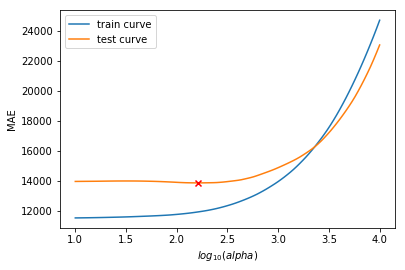

In [199]:
# Get entry with the best test MSE
best_result = gs_results.loc[gs_results.test_mae.idxmin()]

# Print the details
print('Best alpha: {:.5e}'.format(best_result.alpha))
print('Train MAE: {:,.0f}$'.format(best_result.train_mae))
print('Test MAE: {:,.0f}$'.format(best_result.test_mae))

# Plot the validation curves
#plt.plot(gs_results['alpha'], gs_results['train_mae'], label='train curve')
#plt.plot(gs_results['alpha'], gs_results['test_mae'], label='test curve')
plt.plot(np.log10(gs_results['alpha']), gs_results['train_mae'], label='train curve')
plt.plot(np.log10(gs_results['alpha']), gs_results['test_mae'], label='test curve')

plt.scatter(np.log10(best_result.alpha), best_result.test_mae, marker='x', c='red', zorder=10)

plt.xlabel('$log_{10}(alpha)$')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [ ]:
# Variable to store the results
gs_results = []

# Grid search
for alpha in np.logspace(-10, 10, num=100):
    # Create and fit ridge regression
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_tr_rescaled, y_tr)
    
    # Save model and its performance on train/test sets
    gs_results.append({
        'alpha': alpha,
        'train_mse': MSE(y_tr, ridge.predict(X_tr_rescaled)),
        'train_mae': MAE(10**y_tr, 10**ridge.predict(X_tr_rescaled)),
        'test_mse': MSE(y_te, ridge.predict(X_te_rescaled)),
        'test_mae': MAE(10**y_te, 10**ridge.predict(X_te_rescaled)),
    })

# Convert results to DataFrame
gs_results = pd.DataFrame(gs_results)
gs_results.head()




In [ ]:
# Plot the validation curves
plt.semilogx(gs_results['alpha'], gs_results['train_mse'], label='train curve')
plt.semilogx(gs_results['alpha'], gs_results['test_mse'], label='test curve')
plt.xlabel('$log_{10}(alpha)$')
plt.ylabel('MSE')
plt.legend()
plt.show()

## Communicating the results

MAE results of our different models:
	small set - huber reg.         : 21162.16   
	small set - ridge reg.         : 22291.95   
	small set - abreg reg.         : 25617.26   
	medium set - huber reg.        : 16880.13   
	medium set - ridge reg.        : 17675.22   
	medium set - abreg reg.        : 22206.64   
	full set - huber reg.          : 13231.89   (smallest value)
	full set - ridge reg.          : 13862.14   
	full set - abreg reg.          : 20204.36   
	full set - baseline reg.       : 54046.21   


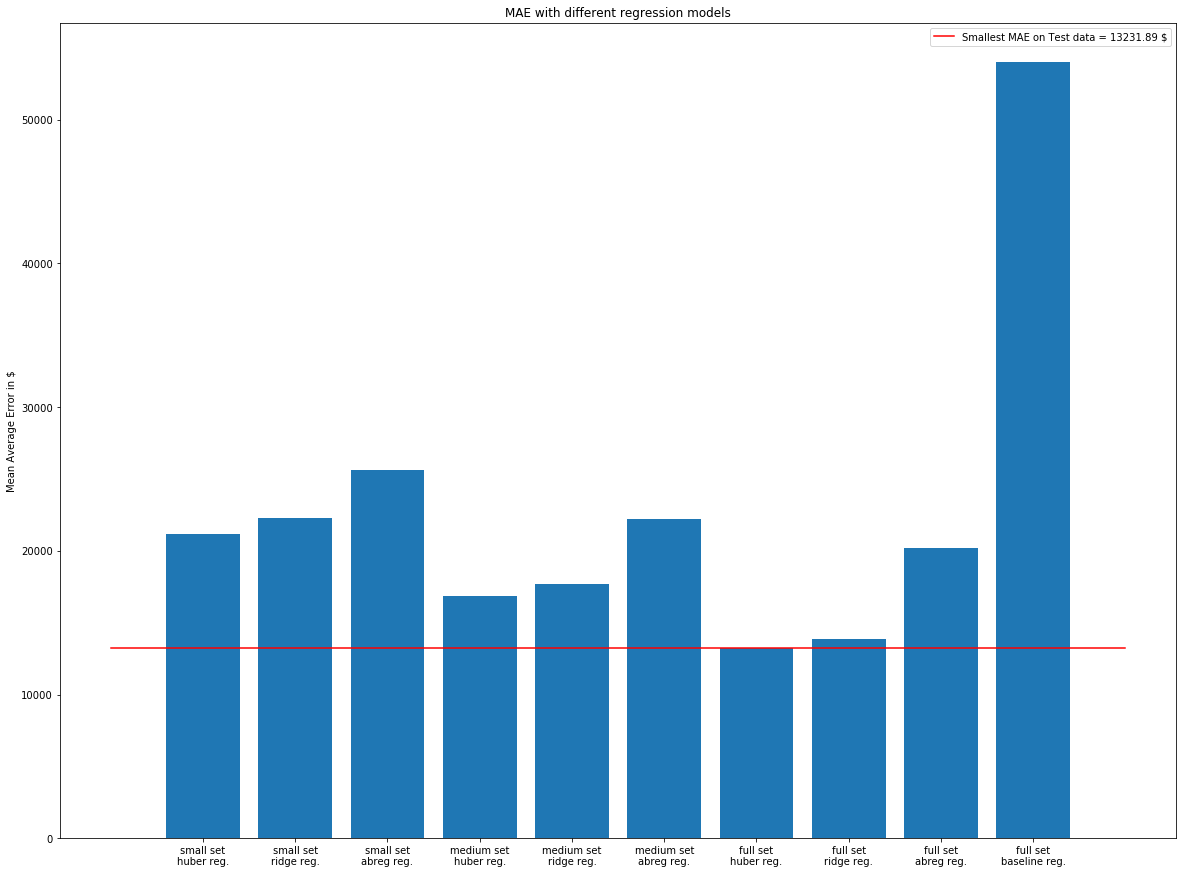

In [194]:
FIGURE_SIZE=(20,15)
#mae_values = [mae_baseline, mae_lr_all, mae_huber_all, mae_huber_cleaned, mae_lr_cleaned]
#mae_labels = ['Baseline w/outliers', 'LR with outliers', 'Huber wizh outliers','Huber w/o outliers', 'LR w/o outliers']

mae_values = []
mae_labels=[]

print("MAE results of our different models:")
for model_name in models.keys():
    for pipeline_name in models[model_name]['regression'].keys():
        mae_labels.append("{} set\n{} reg.".format(model_name, pipeline_name))
        mae_values.append(models[model_name]['regression'][pipeline_name]['mae'])

for (label, value) in zip(mae_labels, mae_values):
    if value == np.min(mae_values):
        smallest = "(smallest value)"
    else:
        smallest = ""
    print("\t{:30} : {:.2f}   {}".format(label.replace("\n"," - "), value, smallest))

# Bar chart to compare our model
plt.figure(figsize=FIGURE_SIZE)
plt.bar([i for i in range(1,len(mae_values)+1)], mae_values)
plt.xticks([i for i in range(1,len(mae_values)+1)], mae_labels)
plt.title('MAE with different regression models')
plt.ylabel("Mean Average Error in $")

mae_min = np.min(mae_values)
plt.plot([0,len(mae_values)+1],[mae_min, mae_min], c='red', label="Smallest MAE on Test data = {:.2f} $".format(mae_min))

plt.legend()
plt.show()
      


## Compute predictions

## Evaluate your predictions